# 2. Importing Data From Excel Files
**Automate data imports from that staple of office life, Excel files. Import part or all of a workbook and ensure boolean and datetime data are properly loaded, all while learning about how other people are learning to code.**

## Introduction to spreadsheets
In this chapter, you will learn how to build pipelines to data stored in spreadsheets, plus additional data wrangling techniques.

### Spreadsheets
Spreadsheets, also called Excel files, are ubiquitous today. If you ever worked with them, the data frame structure probably looked familiar. Like data frames, spreadsheets organize information in tables, with cells of data in rows and columns. Unlike data frames and flat files, spreadsheets can have formulas with automatically updating results. Spreadsheets also support formatting that flat files do not. While data frames can be formatted for presentation purposes, like in Jupyter notebooks, pandas does not import spreadsheet formatting, so check that spreadsheets you want to load do not use formatting to convey important information. Or better yet, export them without formatting. Finally, an Excel file or workbook can have multiple spreadsheets.

### Loading Spreadsheets
At its simplest, reading data from a spreadsheet resembles reading a flat file, just with its own function: `read_excel()`. Let's demonstrate with an Excel file of responses from FreeCodeCamp's New Developer Survey, which asks new developers about their employment, education, job goals, and learning resources used. This file has been modified to make it easier to practice with, but you can grab the full dataset from Kaggle or FreeCodeCamp's GitHub. Previewing the file in a spreadsheet program, we see that it's pretty straightforward: tabular data with no formatting.

As always, we first import pandas as pd, then pass the spreadsheet path as a string to pd dot read Excel and assign the result to a variable. 
```python
import pandas as pd

# Read the Excel file
survey_data = pd.read_excel('fcc_survey.xlsx')
```

### Loading Select Columns and Rows
Of course, not all spreadsheets are so simple, and formatting features that help human readers can make it trickier to read by machine. Spreadsheets commonly contain non-tabular information, such as metadata headers or have smaller tables of information, like this invoice. Fortunately, read Excel, like read CSV, has keyword arguments to select columns and skip or limit rows to get only the cells you want.

`read_excel()` shares many parameters with `read_csv()`, but some work slightly differently, so check pandas documentation if you're unsure. `nrows` is the same, taking an integer of rows to load. `read_excel()`'s `skiprows` argument is also similar: it takes either a number of rows to skip at the beginning, or a list of row numbers to skip. Finally, `read_excel()`'s `usecols` argument accepts a list of either column numbers or column names, or a function to decide whether to load a column, just like read CSV's usecols. However, it also accepts an integer of columns to load, or a string of Excel column letter or ranges, like "A:P".

Let's use these arguments to get a subset of survey response data, focusing on employment. The columns are organized alphabetically, with job-related variables in columns W through AB and income in AR. Also note that this version of the data has a two-row header providing links to the source that we'll want to exclude.

We load the data with read Excel as before, but set `skiprows` to 2 to exclude the metadata. Since we know which column letters we want, we can pass the range and standalone income column as a single string to `usecols`. 
```python
# Read columns W-AB and AR of file, skipping metadata header
survey_data = pd.read_excel('fcc_survey_with_headers.xlsx',
                           skiprows=2,
                           usecols='W:AB, AR')
```

Checking the data frame, we see there are only a few columns loaded, and no metadata.

## Get data from a spreadsheet
In this exercise, you'll create a data frame from a "base case" Excel file: one with a single sheet of tabular data. The `fcc_survey.xlsx` file here has a sample of responses from FreeCodeCamp's annual New Developer Survey. This survey asks participants about their demographics, education, work and home life, plus questions about how they're learning to code. Let's load all of it.

- Read in `fcc_survey.xlsx` and assign it to the variable `survey_responses`.
- Print the first few records of `survey_responses`.

In [1]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel('fcc_survey.xlsx')

# View the head of the data frame
print(survey_responses.head())

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                 0   
3                                                 22                 0   
4                                                 19                 0   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   
3             NaN                NaN           NaN                NaN   
4             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                         

*Depending on how and why an Excel file was generated, you might find spreadsheet imports as painless as this. Excel files created for human readers can get quite complicated, with headers, charts, and multiple tables on a sheet.*

## Load a portion of a spreadsheet
Spreadsheets meant to be read by people often have multiple tables, e.g., a small business might keep an inventory workbook with tables for different product types on a single sheet. Even tabular data may have header rows of metadata, like the New Developer Survey data here. While the metadata is useful, we don't want it in a data frame.

You'll use `read_excel()`'s `skiprows` keyword to get just the data. You'll also create a string to pass to `usecols` to get only columns AD and AW through BA, about future job goals.

- Create a single string, `col_string`, specifying that `pandas` should load column `AD` and the range `AW` through `BA`.
- Load `fcc_survey.xlsx`, setting `skiprows` and `usecols` to skip the first two rows of metadata and get only the columns in `col_string`.
- View the selected column names in the resulting data frame.

In [3]:
# Create string of lettered columns to load
col_string = 'AD, AW:BA'

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("fcc_survey.xlsx", 
                                 skiprows=2, 
                                 usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


*If you need to get a table of data from a sheet with multiple tables on it, you can use `skiprows`, `nrows`, and `usecols` together to delineate which cells of data to read in.*

---
## Getting data from multiple worksheets
You can now create data frames from a single spreadsheet, or from parts of one. It's fairly common for Excel files to contain multiple sheets of data though. In this lesson, you'll learn how to specify sheets to get data from, as well as a workflow to combine multiple sheets into a single data frame.

### Selecting Sheets to Load
Although the terms "spreadsheet" and "Excel file" are often used interchangeably, an Excel file can be a workbook with multiple sheets, containing data as well as charts and metadata. We'll focus on sheets with tabular data. By default, `read_excel()` pulls data from the first sheet in a workbook only. This behavior can be changed with the `sheet_name` keyword argument. Sheet name accepts the name of the desired sheet as a string, an integer indicating the desired sheet's position in the workbook, or a list containing any combination of sheet names and position numbers to read. Two things to note are that sheets are zero-indexed, and that if you load multiple sheets at once, any other arguments passed to `read_excel()` apply to all sheets. For example, if you set `nrows` to 50, the first 50 rows of each sheet listed in sheet name will be loaded. If sheets need different parameters, load them with separate read Excel calls.

### Selecting Sheets to Load
The New Developer Survey file actually contains two sheets: one with responses from 2016, another with responses from 2017. We already got 2016's data, since it's the first sheet. Let's get 2017's.

### Loading Select Sheets
To get the second sheet containing 2017's responses, we can either pass its position index, `1`, to `sheet_name`, or the actual `sheet_name`, `'2017'`. Either method gets the same results, as shown when we check if the two data frames are equal.
```python
# Get the second sheet by position index
survey_data_sheet2 = pd.read_excel('fcc_survey.xlsx',
                                   sheet_name=1)

# Get the second sheet by name
survey_data_2017 = pd.read_excel('fcc_survey.xlsx', 
                                 sheet_name='2017')

print(survey_data_sheet2.equals(survey_data_2017))
```
```
True
```

### Loading All Sheets
What if we wanted to get all sheets in a workbook at once? We could list them all, but the easier way is to pass `None` to `sheet_name`. Let's do this for the survey data and check the data type of the result. 
```python
survey_responses = pd.read_excel('fcc_survey.xlsx', 
                                 sheet_name=None)

print(type(survey_responses))
```
```
<class 'collections.OrderedDict'>
```

Instead of getting a data frame, we got an ordered dictionary. Iterating through the items reveals that the keys are sheet names, and the values are data frames for each sheet.
```python
for key, value in survey_responses.items():
    print(key, type(value))
```
```
2016 <class 'pandas.core.frame.DataFrame'>
2017 <class 'pandas.core.frame.DataFrame'>
```

### Putting It All Together
We have one data frame per sheet, which is great if sheets have different columns or describe different subjects. For the survey data, each sheet has the same columns, just for different years. Let's combine them into one data frame. First, we create an empty data frame, all responses. Then, we loop through the items in the survey responses dictionary. Remember, each value is a data frame corresponding to a worksheet, and each key is a sheet name. For each data frame, we add a column, Year, containing the sheet name, so we know which dataset a record came from. Finally, we append the data frames to all responses. We can check unique values in the year column to confirm that all responses has both years. 
```python
# Create empty data frame to hold all loaded sheets
all_responses = pd.DataFrame()

# Iterate through data frames in dictionary
for sheet_name, frame in survey_responses.items():
    # Add a column so we know which year data is from
    frame['Year'] = sheet_name
    
    # Add each data frame to all_responses
    all_responses = all_responses.append(frame)

# View years in data
print(all_responses.Year.unique())
```
```
['2016', '2017']
```
In this case, we only combined two sheets, so we could have appended one to the other, but looping has the advantage of working for any number of sheets.

## Select a single sheet
An Excel workbook may contain multiple sheets of related data. The New Developer Survey response workbook has sheets for different years. Because `read_excel()` loads only the first sheet by default, you've already gotten survey responses for 2016. Now, you'll create a data frame of 2017 responses using `read_excel()`'s `sheet_name` argument in a couple different ways.

- Create a data frame from the second workbook sheet by passing the sheet's position to `sheet_name`.

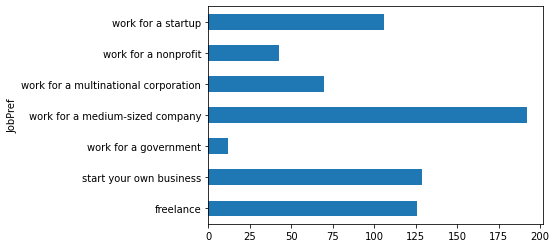

In [11]:
import matplotlib.pyplot as plt

# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("fcc_survey.xlsx",
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name=1)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

- Create a data frame from the `2017` sheet by providing the sheet's name to `read_excel()`.

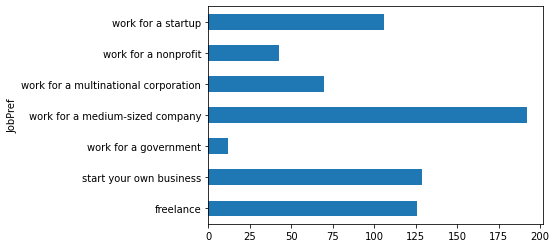

In [12]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel("fcc_survey.xlsx",
                               skiprows=2, 
                               usecols=col_string,
                               sheet_name='2017')

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

*Although it's possible to get multiple spreadsheets in an Excel file with one call to `read_excel()`, it can make more sense to use multiple calls if sheets contain very different data or layouts. That way, you can customize other arguments for each sheet.*

## Select multiple sheets
So far, you've read Excel files one sheet at a time, which lets you customize import arguments for each sheet. But if an Excel file has some sheets that you want loaded with the same parameters, you can get them in one go by passing a list of their names or indices to `read_excel()`'s `sheet_name` keyword. To get them all, pass `None`. You'll practice both methods to get data from `fcc_survey.xlsx`, which has multiple sheets of similarly-formatted data.

- Load both the `2016` and `2017` sheets by name with a list and one call to `read_excel()`.

In [14]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


- Load the `2016` sheet by its position (`0`) and `2017` by name. Note the sheet names in the result.

In [16]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=[0, '2017'])

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys([0, '2017'])


- Load all sheets in the Excel file without listing them all.

In [17]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


*Notice that if you load a sheet by its index position, the resulting data frame's name is also the index number, not the sheet name.*

## Work with multiple spreadsheets
Workbooks meant primarily for human readers, not machines, may store data about a single subject across multiple sheets. For example, a file may have a different sheet of transactions for each region or year in which a business operated.

The FreeCodeCamp New Developer Survey file is set up similarly, with samples of responses from different years in different sheets. Your task here is to compile them in one data frame for analysis.

All sheets have been read into the ordered dictionary `responses`, where sheet names are keys and data frames are values, so you can get data frames with the `values()` method.

- Create an empty data frame, `all_responses`.
- Set up a `for` loop to iterate through the values in the `responses` dictionary.
- Append each data frame to `all_responses` and reassign the result to the same variable name.

Adding 1000 rows
Adding 1000 rows


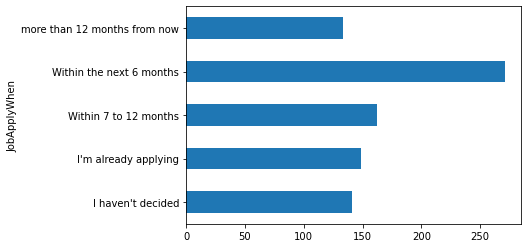

In [26]:
responses = pd.read_excel('fcc_survey.xlsx', 
                          skiprows=2, 
                          usecols=col_string,
                          sheet_name=None)

# Create an empty data frame
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph statuses when apply job in sample
counts = all_responses.groupby("JobApplyWhen").JobApplyWhen.count()
counts.plot.barh()
plt.show()

*You compiled similar spreadsheets into one dataset. This method works well when you know your spreadsheets use the same column names. If they don't, you can end up with lots of NA values where column names don't align.*

---
## Modifying imports: true/false data
In this course, you've mostly handled string and numeric data. This lesson focuses on another data type, Booleans, and special considerations for working with them.

### Boolean Data
A Boolean variable has only two possible values: `True` or `False`, which makes them convenient for tasks like filtering. Despite this simplicity, Booleans can be tricky. We'll use a subset of the New Developer Survey data to focus on them. This version only has an ID column, and columns for whether the respondent attended a programming bootcamp and if they took out a loan for it.

True and false are represented in a few ways for demonstration purposes: zeros and ones, which are common among people with coding experience, Trues and Falses, and yeses and nos, which tend to appear in surveys and forms.

### pandas and Booleans
Let's load this data with no additional arguments and check dtypes. pandas interpreted no columns as Boolean! Even True/False columns were loaded as floats. Let's investigate.
```python
bootcamp_date = pd.read_excel('fcc_survey_booleans.xlsx')
print(bootcamp_data.dtypes)
```
```
ID.x                     object
AttendedBootcamp        float64
AttendedBootcampYesNo    object
AttendedBootcampTF      float64
BootcampLoan            float64
LoanYesNo                object
LoanTF                  float64
dtype: object
```

First, let's sum the data frame's columns to see how many Trues each float column has. Recall that these columns code `True` as `1` and `False` as `0`. 
```python
# count True values
print(bootcamp_data.sum())
```
```
AttendedBootcamp        38
AttendedBootcampTF      38
BootcampLoan            14
LoanTF                  14
dtype: object
```

In our data subset, 38 attended a bootcamp and 14 took out a loan for it. 

Let's also check how many values in each column are missing by summing the results of is NA. 
```python
# Count NAs
print(bootcamp_data.isna().sum())
```
```
ID.x                        0
AttendedBootcamp            0
AttendedBootcampYesNo       0
AttendedBootcampTF          0
BootcampLoan              964
LoanYesNo                 964
LoanTF                    964
dtype: int64
```


Every record has a value for bootcamp attendance, but most of the loan values are blank, even for some students who attended a bootcamp.

Now let's cast these columns as Booleans with the dtype argument. read Excel's dtype works exactly like read CSV's, so we pass a dictionary specifying which columns should be Boolean. 
```python
# Load data, casting True/False columns as Boolean
bool_data = pd.read_excel('fcc_survey_booleans.xlsx',
                          dtype={'AttendedBootcamp': bool,
                                 'AttendedBootcampYesNo': bool,
                                 'AttendedBootcampTF': bool,
                                 'BootcampLoan': bool,
                                 'LoanYesNo': bool,
                                 'LoanTF': bool})

print(bool_date.dtypes)
```
```
ID.x                     object
AttendedBootcamp           bool
AttendedBootcampYesNo      bool
AttendedBootcampTF         bool
BootcampLoan               bool
LoanYesNo                  bool
LoanTF                     bool
dtype: object
```

Checking dtypes, it looks like it worked.
```python
# count True values
print(bool_data.sum())
```
```
AttendedBootcamp         38
AttendedBootcampYesNo  1000
AttendedBootcampTF       38
BootcampLoan            978
LoanYesNo              1000
LoanTF                  978
dtype: object
```
```python
# Count NA values
print(bool_data.isna().sum())
```
```
ID.x                        0
AttendedBootcamp            0
AttendedBootcampYesNo       0
AttendedBootcampTF          0
BootcampLoan                0
LoanYesNo                   0
LoanTF                      0
dtype: int64
```

Checking counts of True values reveals issues. The loan columns have too many Trues, and the yes/no ones are all True. Checking NA values by column, we see there aren't any.

What happened? `pandas` automatically loads `True`/`False` columns as floats, but that can be changed with `dtype`. Boolean values must be either `True` or `False`, so **NAs were re-coded as `True`**. While pandas recognized that zeros and ones are `False` and `True`, respectively, it did not know what to do with Yes and No, so they were all coded as `True`.

### Setting Custom True/False Values
We can solve the issue of the yes/no columns being misinterpreted with `read_excel()`'s `true_values` and false values arguments. Each takes a list of values that pandas should treat as `True` or `False` when they appear in Boolean columns. Values in non-Boolean columns are not converted.

Let's pass "Yes" and "No" as single-item lists to true values and false values.
```python
# Load data, casting True/False columns as Boolean
bool_data = pd.read_excel('fcc_survey_booleans.xlsx',
                          dtype={'AttendedBootcamp': bool,
                                 'AttendedBootcampYesNo': bool,
                                 'AttendedBootcampTF': bool,
                                 'BootcampLoan': bool,
                                 'LoanYesNo': bool,
                                 'LoanTF': bool},
                          true_values=['Yes'],
                          false_values=['No'])
```
Then, we check True counts with the sum method. 
```python
print(bool_date.sum())
```
```
AttendedBootcamp         38
AttendedBootcampYesNo    38
AttendedBootcampTF       38
BootcampLoan            978
LoanYesNo               978
LoanTF                  978
dtype: object
```

Now the yes/no columns match their counterparts. But there is still the issue of NA's being coded as `True`.

### Boolean Considerations
What to do depends on the data. In our case, we don't want fake Trues, so we might decide to keep the loan columns as floats. Things to consider when casting a column as Boolean include the presence of NA values, how the column will be used in the analysis, the consequences of fake True values, and whether alternative representations like floats would do.

## Set Boolean columns
Datasets may have columns that are most accurately modeled as Boolean values. However, `pandas` usually loads these as floats by default, since defaulting to Booleans may have undesired effects like turning NA values into `True`s.

`fcc_survey_subset.xlsx` contains a string ID column and several True/False columns indicating financial stressors. You'll evaluate which non-ID columns have no NA values and therefore can be set as Boolean, then tell `read_excel()` to load them as such with the `dtype` argument.

- Count NA values in each column of `survey_data` with `isna()` and `sum()`. Note which columns besides `ID.x`, if any, have zero NAs.

```python
# Load the data
survey_data = pd.read_excel("fcc_survey_subset.xlsx")

# Count NA values in each column
print(survey_data.isna().sum())
```
```
ID.x                        0
HasDebt                     0
HasFinancialDependents      7
HasHomeMortgage           499
HasStudentDebt            502
dtype: int64
```


- Set `read_excel()`'s `dtype` argument to load the `HasDebt` column as Boolean data.
- Supply the Boolean column name to the print statement to view financial burdens by group.

```python
# Set dtype to load appropriate column(s) as Boolean data
survey_data = pd.read_excel("fcc_survey_subset.xlsx",
                            dtype={'HasDebt': bool})

# View financial burdens by Boolean group
print(survey_data.groupby('HasDebt').sum())
```
```
         HasFinancialDependents  HasHomeMortgage  HasStudentDebt
HasDebt                                                         
False                     112.0              0.0             0.0
True                      205.0            151.0           281.0
```

*Modeling True/False data as Booleans can streamline some data manipulation functions and keep spurious summary statistics, like quartile values, from being calculated. If you want to make a column with NA values Boolean, you can load the data, impute missing values, then re-cast the column as Boolean.*

## Set custom true/false values
In Boolean columns, `pandas` automatically recognizes certain values, like "TRUE" and 1, as `True`, and others, like "FALSE" and 0, as `False`. Some datasets, like survey data, can use unrecognized values, such as "Yes" and "No".

For practice purposes, some Boolean columns in the New Developer Survey have been coded this way. You'll make sure they're properly interpreted with the help of the `true_values` and `false_values` arguments.

- Load the Excel file, specifying `"Yes"` as a true value and `"No"` as a false value.

```python
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("fcc_survey_yn_data.xlsx",
                              dtype={"HasDebt": bool,
                                     "AttendedBootCampYesNo": bool},
                              true_values=['Yes'],
                              false_values=['No'])

# View the data
print(survey_subset.head())
```

```
                               ID.x  AttendedBootCampYesNo  HasDebt  HasFinancialDependents  HasHomeMortgage  HasStudentDebt
0  cef35615d61b202f1dc794ef2746df14                  False     True                     1.0              0.0             1.0
1  323e5a113644d18185c743c241407754                  False    False                     0.0              NaN             NaN
2  b29a1027e5cd062e654a63764157461d                  False    False                     0.0              NaN             NaN
3  04a11e4bcb573a1261eb0d9948d32637                  False     True                     0.0              0.0             1.0
4  9368291c93d5d5f5c8cdb1a575e18bec                  False     True                     0.0              0.0             0.0
```

*Building a data pipeline that sets Boolean dtypes and uses custom true and false values requires being very familiar with the data. It's a good idea to import the data as-is and explore it before doing so.*

---
## Modifying imports: parsing dates
You've now worked with numeric, string, and Boolean data. This lesson will focus on one last data type you're likely to encounter: datetimes.

### Date and Time Data
How computers handle dates and times is a rich topic, but what you need to know for now is that Python stores them as a special data type, datetime. Datetimes can be translated into myriad text representations, and there is a common set of codes used to describe how datetimes are formatted as strings.

### pandas and Datetimes
By default, pandas loads datetime data as objects. If you want to arrange records by time, select within a timespan, or calculate intervals, though, you'll need datetime columns. We use the parse dates keyword argument, not dtype, to specify datetime columns. `parse_dates` accepts a list of column names or numbers to parse. It also accepts a list of lists, where each sub-list is a group of columns that should be combined and parsed as one, such as separate day, month, and year columns. Finally, to combine columns, parse them, and store the result as a new column, you can supply a dictionary, where each key is a new column name and each value is a list of columns to parse.

Let's see this with the New Developer Survey data, whose datetime columns have been modified for demonstration purposes.

Part1StartTime and Part1Endtime have data in standard year-month-day-hour-minute-second format.

Part2StartTime's data has been split into date and time columns.

Part2EndTime is in a nonstandard format.

### Parsing Dates
To parse the dates in standard format, we pass the column names in a list to read Excel's parse dates argument.

```python
# List columns of dates to parse
date_cols = ['Part1StartTime', 'Part1EndTime']

# Load file, parsing standard datetime columns
survey_df = pd.read_exvel('fcc_survey.xlsx',
                          parse_dates=date_cols)
```

When we check the dtypes of the timestamp columns, we see the two columns were parsed successfully.

```python
# check data types of timestamp columns
print(survey_df[['Part1StartTime',
                 'Part1EndTime',
                 'Part2StartDate',
                 'Part2StartTime',
                 'Part2EndTime']].dtypes)
```

```
Part1StartTime   datetime64[ns]
Part1EndTime     datetime64[ns]
Part2StartDate           object
Part2StartTime           object
Part2EndTime             object
dtype: object
```

To parse the split-up timestamp columns, we can add a list within the list, containing `Part2StartDate` and `Part2StartTime`, and pass that to parse dates. pandas creates a new combined datetime column, `Part2StartDate_Part2StartTime`.

```python
# List columns of dates to parse
date_cols = ['Part1StartTime',
             'Part1EndTime',
             [['Part2StartDate', 'Part2StartTime']]]

# Load file, parsing standard and split datetime columns
survey_df = pd.read_excel('fcc_survey.xlsx',
                          parse_dates=date_cols)

print(survey_df.head(3))
```

```
  Part2StartDate_Part2StartTime   Age   ...   SchoolMajor  StudentDebtOwe
0           2016-03-29 21:24:57  28.0   ...           NaN           20000
1           2016-03-29 21:27:14  22.0   ...           NaN             NaN
2           2016-03-29 21:27:13  19.0   ...           NaN             NaN
```

But to control the column names, let's create a dictionary, pass that instead, and view the resulting column.

```python
# List columns of dates to parse
date_cols = ['Part1Start': 'Part1StartTime',
             'Part1End': 'Part1EndTime',
             'Part2Start' : [['Part2StartDate', 
                              'Part2StartTime']]]

# Load file, parsing standard and split datetime columns
survey_df = pd.read_excel('fcc_survey.xlsx',
                          parse_dates=date_cols)

print(survey_df.Part2Start.head(3))
```

```
0  2016-03-29 21:24:57
1  2016-03-29 21:27:14
2  2016-03-29 21:27:13
NAme: Part2Start, dtype: datatime64[ns]
```

### Non-Standard Dates
However, `parse_dates` only works if the data is in a format that pandas understands. If you try to parse unusually-formatted dates with `parse_dates`, like 123199 for December 31, 1999, you'll get the columns back as strings. Instead, convert nonstandard dates after import with pandas' `to_datetime()` method. To datetime takes the data frame and column to convert, plus a `format` argument containing a string that describes how the data is formatted.

### Datetime Formatting
Datetime formatting is described with a set of codes. strftime.org is a valuable reference for them all.

Some important codes are the ones for four-digit year, zero-padded month, zero-padded day, hour on the 24-hour clock, zero-padded minute, and zero-padded second.

Code | Meaning | Example
:---|:---|:---
`%Y` | Year (4-digit) | 1999
`%m` | Month (zero-padded) | 03
`%d` | Day (zero-padded) | 01
`%H` | Hour (24-hour clock) | 21
`%M` | Minute (zero-padded) | 09
`%S` | Second (zero-padded) | 05

### Parsing Non-Standard Dates
Let's use to datetime to parse Part2EndTime. We review the data to build the string format description: `%m%d%Y %H:%M:%S`. We pass the data frame and column to pd to datetime, and supply the format string to the format keyword argument. We reassign the result back to Part2EndTime.
```python
format_string = '%m%d%Y %H:%M:%S'
survey_df['Part2EndTime'] = pd.to_datetime(survey_df['Part2EndTime'],
                                           format=format_string)
```

When we check the column, we see the dates were parsed correctly.

```python
print(survey_df.Part2EndTime.head())
```

```
0  2016-03-29 21:27:25
1  2016-03-29 21:29:10
2  2016-03-29 21:28:21
3  2016-03-29 21:30:51
4  2016-03-29 21:31:54
NAme: Part2EndTime, dtype: datatime64[ns]
```

## Parse simple dates
`pandas` does not infer that columns contain datetime data; it interprets them as object or string data unless told otherwise. Correctly modeling datetimes is easy when they are in a standard format -- we can use the `parse_dates` argument to tell `read_excel()` to read columns as datetime data.

The New Developer Survey responses contain some columns with easy-to-parse timestamps. In this exercise, you'll make sure they're the right data type.

- Load `fcc_survey.xlsx`, making sure that the `Part1StartTime` column is parsed as datetime data.
- View the first few values of the `survey_data.Part1StartTime` to make sure it contains datetimes.

```python
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("fcc_survey.xlsx", parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())
```

```
0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]
```

*`pandas` can automatically parse many common date and time formats. It can even parse standalone times, without dates, but the parsed times will have the date the code was run.*

## Get datetimes from multiple columns
Sometimes, datetime data is split across columns. A dataset might have a date and a time column, or a date may be split into year, month, and day columns.

A column in this version of the survey data has been split so that dates are in one column, `Part2StartDate`, and times are in another, `Part2StartTime`. Your task is to use `read_excel()`'s `parse_dates` argument to combine them into one datetime column with a new name.

- Create a dictionary, `datetime_cols` indicating that the new column `Part2Start` should consist of `Part2StartDate` and `Part2StartTime`.
- Load the survey response file, supplying the dictionary to the `parse_dates` argument to create a new `Part2Start` column.
- View summary statistics about the new `Part2Start` column with the `describe()` method.

```python
# Create dict of columns to combine into new datetime column
datetime_cols = {'Part2Start': ['Part2StartDate', 'Part2StartTime']}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel('fcc_survey_dts.xlsx',
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())
```
```
count                    1000
unique                    985
top       2016-03-30 01:29:27
freq                        2
first     2016-03-29 21:24:57
last      2016-03-30 09:08:18
Name: Part2Start, dtype: object
```

*Note that the keys in a dictionary passed to `parse_dates` cannot be names of columns already in the data frame. Also, when combining columns to parse, their order in the list does not matter.*

## Parse non-standard date formats
So far, you've parsed dates that `pandas` could interpret automatically. But if a date is in a non-standard format, like 19991231 for December 31, 1999, it can't be parsed at the import stage. Instead, use `pd.to_datetime()` to convert strings to dates after import.

The New Developer Survey data has been loaded as `survey_data` but contains an unparsed datetime field. We'll use `to_datetime()` to convert it, passing in the column to convert and a string representing the date format used.

For more on date format codes, see [this reference](http://strftime.org/). Some common codes are year (`%Y`), month (`%m`), day (`%d`), hour (`%H`), minute (`%M`), and second (`%S`).

#### Question
Examine `survey_data`'s `Part2EndTime` column to see the data type and date format. 
```python
print(survey_data.Part2EndTime.head(1))
```
```
0    03292016 21:27:25
Name: Part2EndTime, dtype: object
```

Choose the code that describes the date format in `Part2EndTime`.

1. ~`%m%d%Y %H%M%S`~
2. ~`%m%d%y %H:%M:%S`~
3. **`%m%d%Y %H:%M:%S`**
4. ~`%M%D%Y %h:%m:%s`~

- Parse `Part2EndTime` using `pd.to_datetime()`, the `format` keyword argument, and the format string you just identified. Assign the result back to the `Part2EndTime` column.

```python
# Parse datetimes and assign result back to Part2EndTime
survey_data['Part2EndTime'] = pd.to_datetime(survey_data['Part2EndTime'], format='%m%d%Y %H:%M:%S')
```

- Print the head of `Part2EndTime` to confirm the column now contains datetime values.

```python
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], format="%m%d%Y %H:%M:%S")

# Print first few values of Part2EndTime
print(survey_data.Part2EndTime.head())
```

```
0   2016-03-29 21:27:25
1   2016-03-29 21:29:10
2   2016-03-29 21:28:21
3   2016-03-29 21:30:51
4   2016-03-29 21:31:54
Name: Part2EndTime, dtype: datetime64[ns]
```

*Datetime information comes in a variety of formats, and having the skills to parse them lets you perform time-specific operations like calculating intervals.*